In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib as plt
from sklearn.datasets import make_classification #data_generation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score


In [2]:
np.random.seed(42)
X,y = make_classification(n_samples = 1000, n_features=5, n_redundant=1, n_classes=2, random_state=42)

In [3]:
X,y

(array([[-0.81842867, -0.62636899, -0.27220548,  1.53236772,  1.65904812],
        [ 0.39241597,  0.43241687, -0.93239919, -0.50896363, -0.61378471],
        [ 1.7495839 ,  0.3544918 , -0.66487094,  1.38145408, -0.55038561],
        ...,
        [-0.39719532, -0.78650282,  1.42123618, -1.10226974,  1.24670031],
        [ 2.05654356, -0.25690674,  0.14496917, -1.13088844,  0.55870874],
        [-1.53270056, -0.30599004,  0.59467649, -0.19628065,  0.46522532]]),
 array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 

In [4]:
X.shape

(1000, 5)

In [5]:
df_x = pd.DataFrame(X)

<AxesSubplot:>

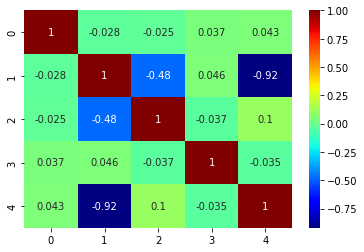

In [6]:
sns.heatmap(df_x.corr(), annot = True, cmap ="jet")

In [7]:
X[1]

array([ 0.39241597,  0.43241687, -0.93239919, -0.50896363, -0.61378471])

In [8]:
sum(y)

497

In [ ]:
##Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [10]:
X_train.shape

(800, 5)

In [11]:
X_test.shape

(200, 5)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
model.score(X_train, y_train)

0.865

In [15]:
model.score(X_test, y_test)

0.87

In [16]:
y_pred = model.predict(X_test)

In [17]:
confusion_matrix(y_test,y_pred)

array([[87, 18],
       [ 8, 87]], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,y_pred)

0.87

In [19]:
precision_score(y_test,y_pred)

0.8285714285714286

In [20]:
recall_score(y_test,y_pred)

0.9157894736842105

In [21]:
f1_score(y_test,y_pred)

0.8700000000000001

In [ ]:
##Weight farklı

In [22]:
np.random.seed(42)
X,y = make_classification( n_samples = 1000, n_features=5, n_redundant=1, n_classes=2, random_state=42,weights = [0.9,0.1])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [24]:
sum(y)

103

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
model.score(X_test,y_test)

0.945

In [29]:
model.score(X_train,y_train)

0.9275

In [36]:
y_pred = model.predict(X_test)

In [37]:
confusion_matrix(y_test,y_pred)

array([[183,   5],
       [  6,   6]], dtype=int64)

In [38]:
recall_score(y_test,y_pred)

0.5

In [39]:
precision_score(y_test,y_pred)

0.5454545454545454

In [40]:
accuracy_score(y_test,y_pred)

0.945

In [41]:
f1_score(y_test,y_pred)

0.5217391304347826

In [46]:
cv = cross_validate(estimator=model, X=X, y=y, cv=10,  return_train_score=True)

In [47]:
cv

{'fit_time': array([0.00500035, 0.        , 0.00501561, 0.        , 0.        ,
        0.        , 0.00499964, 0.        , 0.00499868, 0.        ]),
 'score_time': array([0.        , 0.        , 0.        , 0.00498438, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([0.92, 0.96, 0.93, 0.94, 0.94, 0.96, 0.93, 0.89, 0.89, 0.9 ]),
 'train_score': array([0.93555556, 0.93222222, 0.93333333, 0.92888889, 0.93      ,
        0.92666667, 0.93333333, 0.94111111, 0.93444444, 0.93333333])}

In [49]:
cv["test_score"].mean()

0.9259999999999999

In [50]:
cv["train_score"].mean()

0.9328888888888889